# Description
The first part is focused on inferring the missing value about skin color rating using machine learning algorithm. The second part try to infer wether referees' behavior change depending of the skin-color of the player.

Let start by doing some imports.

In [3]:
import os
import pandas as pd
import numpy as np
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt                         # Matplotlib's pyplot: MATLAB-like syntax
import seaborn as sns                                   # For pretty plots

## Skin-color inferring
First, let have a look to [mathewzila's suggestion](https://github.com/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb) where the dataset is a disaggregate version of `data/CrowdstormingDataJuly1st.csv`. By _disaggregate_, we means that there is one observation per game between a player and a referee (in place of one observation per dyad).

Depending of the computations, this dataset might be a better option. Both will be imported in order to do some comparison.

In [4]:
df = pd.read_csv(os.path.join('data', 'CrowdstormingDataJuly1st.csv'))
df.head(10)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [5]:
dfd = pd.read_csv(os.path.join('data', 'crowdstorm_disaggregated.csv'))
dfd.head(10)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone,allreds,allredsStrict,refCount
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375,0,0,1
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750,0,0,1
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN,0,0,3
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN,0,0,3
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN,0,0,3
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,0,0,30
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125,0,0,30
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000,0,0,30
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250,0,0,30
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000,0,0,30


In [6]:
df_cols = set(df.columns)
dfd_cols = set(dfd.columns)

print("Number of lost columns: {}".format(len(df_cols - dfd_cols)))

Number of lost columns: 0


As we can see, the deaggregated dataset doesn't remove any columns from the base data set.

In [7]:
print("New columns: {}".format(dfd_cols - df_cols))

New columns: {'skintone', 'allreds', 'refCount', 'allredsStrict'}


As we can see, new columns are created. Based on [source code](https://osf.io/w7tds/),

- allredsStrict: If player has received a red without a yellow
- allreds: If player has received a red during this game (either because he had a yellow one before, or if he's directly received a red)
- skintone: Average of rater1 and rater2 for this player
- refCount: Number of dyads per referee (thus, how many player the referee is linked to)

All are indicator variable (either 1 if true, 0 o.w.)

**Remark**: the field `games` (i.e. count the number of match between the player and the referee) is redundant on `dfd`, since there is one observation per game.

In [8]:
print("All fields: {}".format(dfd.columns))

All fields: Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'skintone', 'allreds', 'allredsStrict',
       'refCount'],
      dtype='object')


Let add a `skintone` field to the aggregated version of the data

In [9]:
df['skintone'] = 0.5 * (df['rater1']+df['rater2'])
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002,NaN


### Look on skintone
As mentioned before, `skintone` is the mean between the two skin-color ratings

In [20]:
df_skinton = df[["playerShort", "skintone"]].reset_index().groupby('playerShort', axis=0).mean()
mean_skin = set(df_skinton['skintone'].dropna().unique().tolist())

unique_skin = set(df['skintone'].dropna().unique().tolist())

print("Values not in both: {}".format(mean_skin.symmetric_difference(unique_skin)))


Values not in both: set()


One error in the dataset might have been to have several different `skintone` value for the same user. As the previous code suggests, the mean of the `skintone` over a player doesn't create new value (suggesting that all the `skintone` for a player are the same).

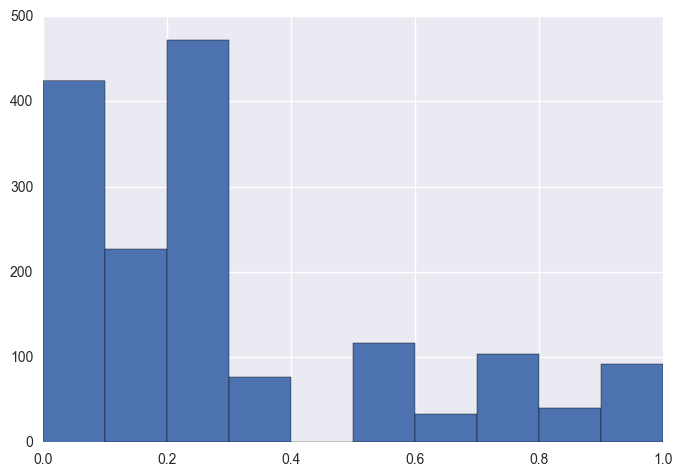

In [22]:
df_skinton['skintone'].dropna().hist()

As we can see, there are more players with a white skin than with a dark one. This need to be taken into consideration for the analysis.

### Prepare the data for Random Forest
Roughly, we want to use the data where we know the skin rating (thus, ones having a photo) to predict data for missing values.

In [70]:
infer_columns = ['rater1', 'rater2', 'skintone', 'photoID'] # Columns that shouldn't arise in training
                                                            # All of these data is diretly part of the skintone 
                                                            # and therefore are significant biais if trained on it
        
#rf_dataset_cols = ["club", "leagueCountry","height", "weight", "position", "skintone"]
rf_dataset_cols = ["height", "weight", 'skintone']


infer_cols_to_drop = set(infer_columns) & set(rf_dataset_cols)
        
rf_dataset = dfd[rf_dataset_cols]
        
# Predict set, 
X_predict = rf_dataset[rf_dataset['skintone'].isnull()].copy()
X_predict.drop(infer_cols_to_drop, axis=1, inplace=True)

# Training set
dfd_training = rf_dataset.dropna(subset=['skintone'])
X = dfd_training.drop(infer_cols_to_drop, axis=1, inplace=False)
y = dfd_training['skintone'].copy()

# Print some information about data
print("Predict set shape: {}".format(X_predict.shape))
print("Testing set shape: X={} y={}".format(X.shape, y.shape))
print("Predict over train ratio: {:0.2f}%".format(X_predict.shape[0] / X.shape[0] * 100))

Predict set shape: (0, 2)
Testing set shape: X=(371813, 2) y=(371813,)
Predict over train ratio: 0.00%


### First random forest
RandomForestClassifier has [several arguments](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to check at least for a first train:

- `n_estimators` (default: 10): number of trees in the forest
- `max_depth` (default: go until pure leaves): the max depth of each tree

In [69]:
number_estimators = list(range(10, 50+1, 5))
depth = list(range(30, 150+1, 10))

from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

params=dict(n_estimators=number_estimators, max_depth=depth)
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=10)
grid_search.fit(X, y)
print("Best params found: {} (error: {})".format(0,0))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').